# Estimate the total compensation to be provided to an employee

In [25]:
import pandas as pd

In [26]:
train_data = pd.read_csv('train_set.csv')

In [27]:
train_data

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [28]:
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [29]:
train_data.rename(columns={'sales':'dept'}, inplace=True)

In [30]:
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
train_data.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


## Preprocessing

In [33]:
train_data.select_dtypes('object').columns

Index(['OG', 'DC', 'Dept', 'Union', 'JF', 'Job', 'YT'], dtype='object')

In [34]:
train_data.Dept.value_counts()

Public Health                             62859
Municipal Transportation Agency           42149
Human Services                            23847
Police                                    22911
Recreation and Park Commission            15968
Airport Commission                        13507
Fire Department                           11564
General Services Agency - Public Works    10958
Sheriff                                    7410
General Services Agency - City Admin       7343
PUC Public Utilities Commission            6758
Public Library                             6597
PUC Water Department                       5813
PUC Wastewater Enterprise                  4114
Superior Court                             3959
PUC Hetch Hetchy                           2894
Juvenile Probation                         2356
City Attorney                              2336
Department of Building Inspection          2218
District Attorney                          2133
Human Resources                         

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [36]:
le = LabelEncoder()

In [40]:
Dept = le.fit_transform(train_data.Dept)

In [41]:
ohe = OneHotEncoder()

In [42]:
ohe_Dept = ohe.fit_transform(Dept.reshape(-1,1))

In [43]:
le.classes_

array(['Academy of Sciences', 'Adult Probation', 'Airport Commission',
       'Arts Commission', 'Asian Art Museum', 'Assessor/Recorder',
       'Board of Appeals', 'Board of Supervisors',
       'Child Support Services', 'Children and Families Commission',
       'Children, Youth & Their Families', 'City Attorney',
       'City Planning', 'Civil Service Commission',
       'Community Investment & Infrastructure', 'Controller',
       'Department of Building Inspection',
       'Department of Emergency Management',
       'Department of the Status of Women', 'District Attorney',
       'Economic and Workforce Development', 'Elections', 'Environment',
       'Ethics Commission', 'Fine Arts Museum', 'Fire Department',
       'General Fund Unallocated', 'General Services Agency - City Admin',
       'General Services Agency - Public Works',
       'General Services Agency - Technology', 'Health Service System',
       'Human Resources', 'Human Rights Commission', 'Human Services',
       

In [44]:
Dept_df = pd.DataFrame(ohe_Dept.toarray(), dtype=int,columns=le.classes_)

In [46]:
train_data['salary_tf'] = train_data.Salaries.map({'low':1,'medium':2,'high':3})

In [47]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [48]:
train_data.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation', 'salary_tf'],
      dtype='object')

In [54]:
df = train_data[['Year','Salaries', 'Total_Compensation']]

<AxesSubplot:ylabel='Density'>

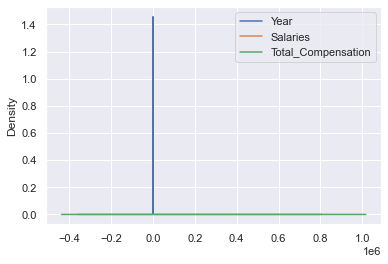

In [55]:
df.plot.kde()

In [56]:
mm = MinMaxScaler()

In [57]:
scaled_np = mm.fit_transform(df)

In [59]:
Dept_np = Dept_df.values

In [61]:
train_df = train_data[['Year','OGC','UC','EI','Salaries','Overtime','H/D']]

In [62]:
train_np = train_df.values

In [77]:
target_data = train_df.OGC

In [78]:
feature_data = np.hstack([train_np, scaled_np, Dept_np])

In [79]:
feature_data.shape

(287836, 64)

## Model Building

In [80]:
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

In [81]:
models = [ LogisticRegression(class_weight='balanced'), SGDClassifier(max_iter=10), PassiveAggressiveClassifier(max_iter=20), RandomForestClassifier(n_estimators=20)]

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
trainX,testX,trainY,testY = train_test_split(feature_data,target_data)

In [84]:
for model in models:
    model.fit(trainX,trainY)
    print (model.score(testX,testY))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.30863408329743325


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.3704748537361553
0.27460081435261746
0.9996803735460471
